<a href="https://colab.research.google.com/github/aparnavinayankozhipuram/Mistral-7B-Evaluation/blob/main/Copy_of_ComparisonofLlama13BvsRAGMistral7B_CHART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Metric          System     Score               Group
0     BLEU     Llama-1 13B  0.017217  Lexical Similarity
1     BLEU  RAG Mistral-7B  0.064307  Lexical Similarity
2  ROUGE-1     Llama-1 13B  0.084629  Lexical Similarity
3  ROUGE-1  RAG Mistral-7B  0.284187  Lexical Similarity
4  ROUGE-L     Llama-1 13B  0.075289  Lexical Similarity


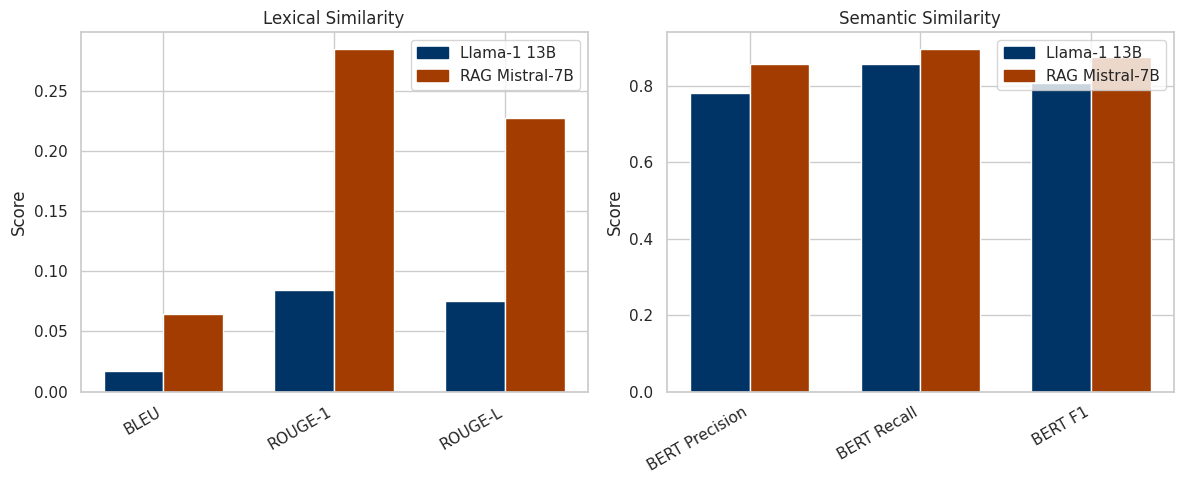

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_theme(style='whitegrid')
lexical_metrics=['BLEU','ROUGE-1','ROUGE-L']
semantic_metrics=['BERT Precision','BERT Recall','BERT F1']
base_label='Llama-1 13B'
rag_label='RAG Mistral-7B'
baseline_vals=[0.0172173,0.0846289,0.0752895,0.78,0.855844,0.8073012]
rag_vals=[0.064307,0.284187,0.227196,0.857671,0.894786,0.875506]
metrics=lexical_metrics+semantic_metrics
records=[]
for metric,base,rag in zip(metrics,baseline_vals,rag_vals):
    group='Lexical Similarity' if metric in lexical_metrics else 'Semantic Similarity'
    records.append({'Metric':metric,'System':base_label,'Score':base,'Group':group})
    records.append({'Metric':metric,'System':rag_label,'Score':rag,'Group':group})

df=pd.DataFrame(records)
print(df.head())

fig,axes=plt.subplots(1,2,figsize=(12,5))
colors={base_label:'#003366',rag_label:'#A33C00'}
width=0.35
panel_specs=[('Lexical Similarity',lexical_metrics),('Semantic Similarity',semantic_metrics)]
for ax,(group,order) in zip(axes,panel_specs):
    sel=df[df['Group']==group].copy()
    sel['Metric']=pd.Categorical(sel['Metric'],categories=order,ordered=True)
    sel.sort_values('Metric',inplace=True)
    piv=sel.pivot(index='Metric',columns='System',values='Score')
    x=range(len(piv))
    ax.bar([p-width/2 for p in x],piv[base_label],width,color=colors[base_label])
    ax.bar([p+width/2 for p in x],piv[rag_label],width,color=colors[rag_label])
    ax.set_xticks(x)
    ax.set_xticklabels(piv.index,rotation=30,ha='right')
    ax.set_title(group)
    ax.set_ylabel('Score')
    ax.legend(handles=[plt.Rectangle((0,0),1,1,color=colors[base_label]),
                       plt.Rectangle((0,0),1,1,color=colors[rag_label])],
              labels=[base_label,rag_label],loc='upper right')
plt.tight_layout()
plt.show()